In [11]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
b_size=32
n_classes=10
epochs=100
data_augumentation=True

In [3]:
(x_train,y_train),(x_test, y_test)=cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


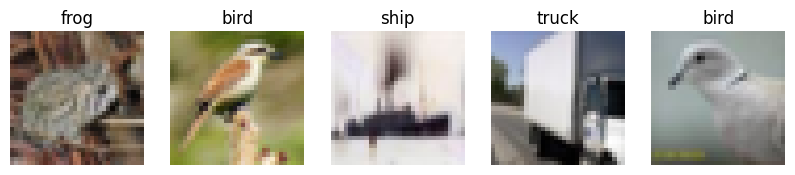

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_images = 5
random_indices = np.random.randint(0, len(x_train), num_images)
plt.figure(figsize=(10, 5))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_train[index])
    plt.title(class_names[y_train[index][0]])
    plt.axis('off')

plt.show()

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48,(3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(80,(3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.25))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 80)          │          34,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          92,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │          64,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211,206 (825.02 KB)

 Trainable params: 211,206 (825.02 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
tb_callback=tf.keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

In [6]:
if not data_augumentation:
  print('Not using data augumentation')
  model.fit(x_train, y_train, batch_size=b_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True, callbacks=[tb_callback])
else:
  print('Using real time data augumentation')
  datagen=ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False,
                             zca_whitening=False, rotation_range=10, width_shift_range=0.2,height_shift_range=0.2, horizontal_flip=True, vertical_flip=False)
  datagen.fit(x_train)
  model.fit(datagen.flow(x_train, y_train, batch_size=b_size), epochs=epochs, validation_data=(x_test, y_test), callbacks=[tb_callback])

Using real time data augumentation
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 34ms/step - accuracy: 0.1843 - loss: 2.1516 - val_accuracy: 0.3625 - val_loss: 1.7797
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3237 - loss: 1.7989 - val_accuracy: 0.4242 - val_loss: 1.5962
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3815 - loss: 1.6752 - val_accuracy: 0.4565 - val_loss: 1.5028
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4150 - loss: 1.5866 - val_accuracy: 0.4713 - val_loss: 1.4421
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4444 - loss: 1.5127 - val_accuracy: 0.4942 - val_loss: 1.3921
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4651 - loss: 1.4580 - val_accuracy: 0.5182 - val_loss: 1.3347
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4876 - loss: 1.4099 - val_accuracy: 0.5479 - val_loss: 1.2475
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.5056 - los

In [9]:
scores=model.evaluate(x_test,y_test,verbose=1)
print("Test Loss:",scores[0])
print("Test Accuracy:",scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8051 - loss: 0.5744
Test Loss: 0.5735401511192322
Test Accuracy: 0.808899998664856


In [10]:
model.save('cifar10_model.h5')
print('Model saved Successfully')

Model saved Successfully


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


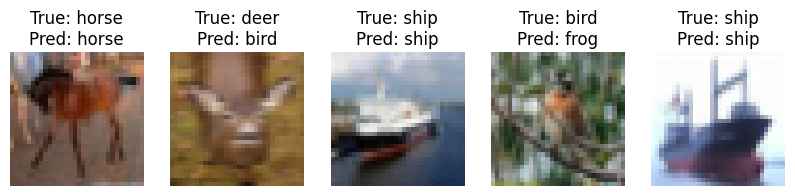

In [39]:
num_images = 5
random_indices = np.random.randint(0, len(x_test), num_images)
predictions = model.predict(x_test[random_indices])

plt.figure(figsize=(10, 5))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index])
    predicted_class = class_names[np.argmax(predictions[i])]
    true_class = class_names[(y_test[index][0])]
    plt.title(f"True: {true_class}\nPred: {predicted_class}")
    plt.axis('off')
plt.show()